<a href="https://colab.research.google.com/github/SoarAway/mlpc/blob/main/MLPC_Indv_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing dataset
DATA_DIR_REAL ="/content/True.csv"
df_real = pd.read_csv(DATA_DIR_REAL, header = 0)

DATA_DIR_FAKE ="/content/Fake.csv"
df_fake = pd.read_csv(DATA_DIR_FAKE, header = 0)

In [62]:
# Combining both files & one hot encoding
df_real['label'] = 0
df_fake['label'] = 1
df = pd.concat([df_real, df_fake], ignore_index=True)
display(df.head())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [18]:
# Dataset Information
print(df.info())
print()
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

Number of rows: 44898
Number of columns: 5


In [63]:
# Common Words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter

def get_top_n_words(corpus, n=20):
    stop_words = set(stopwords.words('english'))
    word_counts = Counter(words)
    return word_counts.most_common(n)

real_news_corpus = df[df['label'] == 0]['text']
fake_news_corpus = df[df['label'] == 1]['text']

top_real_words = get_top_n_words(real_news_corpus, 20)
top_fake_words = get_top_n_words(fake_news_corpus, 20)

df_real_words = pd.DataFrame(top_real_words, columns=['Word', 'Count'])
df_fake_words = pd.DataFrame(top_fake_words, columns=['Word', 'Count'])


fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='Count', y='Word', data=df_real_words, ax=ax[0], palette='viridis')
ax[0].set_title('Most Common Words in Real News')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Word')
sns.barplot(x='Count', y='Word', data=df_fake_words, ax=ax[1], palette='plasma')
ax[1].set_title('Most Common Words in Fake News')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'words' is not defined

In [64]:
stopword_list = ['one', 'two','said']

In [67]:
# Pre-processing - text cleaning
import string
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import contractions

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove (Reuters)
    text = re.sub(r'\(reuters\)', '', text)
    # Remove (cnn)
    text = re.sub(r'\(cnn\)', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(stopword_list)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the 'text' column
df['text'] = df['text'].apply(clean_text)

display(df.head())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",washington head conservative republican factio...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,washington transgender people allowed first ti...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington special counsel investigation links...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,washington trump campaign adviser george papad...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,seattlewashington president donald trump calle...,politicsNews,"December 29, 2017",0


A sample of the 20 most common words and their counts:
[('said', 130030), ('trump', 115995), ('us', 62899), ('would', 54845), ('president', 50809), ('people', 40568), ('one', 35230), ('also', 31177), ('state', 31081), ('new', 30870), ('donald', 27509), ('house', 26851), ('government', 26435), ('clinton', 25788), ('states', 25536), ('obama', 24840), ('republican', 24264), ('could', 23844), ('united', 23534), ('told', 23343)]


/tmp/ipython-input-60-1361595514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_top_words, palette='rocket')


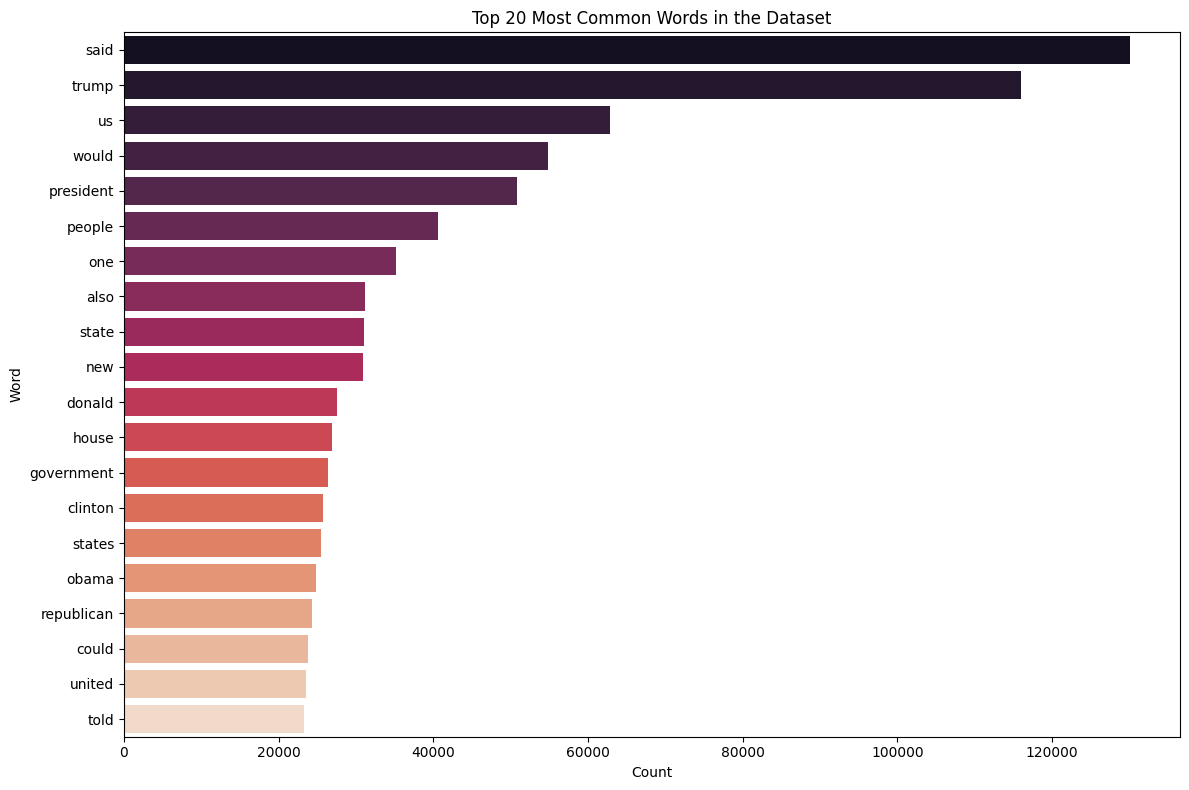

In [60]:
all_words = [word for sentence in df['text'] for word in str(sentence).lower().split()]

word_counts = Counter(all_words)

print("A sample of the 20 most common words and their counts:")
print(word_counts.most_common(20))

df_top_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_top_words, palette='rocket')
plt.title('Top 20 Most Common Words in the Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [21]:
# Pre-processing - identifying missing values
print(df_real.isna().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Pre-processing - Initializing variables & Splitting dataset
# Shuffling dataset
df_shuffled = shuffle(df, random_state=42)

# Initializing the dependant and independant variable
x = df_shuffled['text']
y = df_shuffled['label'].values

# Pareto Theory (80 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# 7. Create a TF-IDF + Logistic Regression pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# 8. Train the model
pipeline.fit(x_train, y_train)

# 9. Evaluate the model
y_pred = pipeline.predict(x_test)

print("Classification Report (Logistics Regression):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm_logi = confusion_matrix(y_test, y_pred)
print(cm_logi)

Classification Report (Logistics Regression):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.98      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
[[4271   40]
 [  80 4589]]


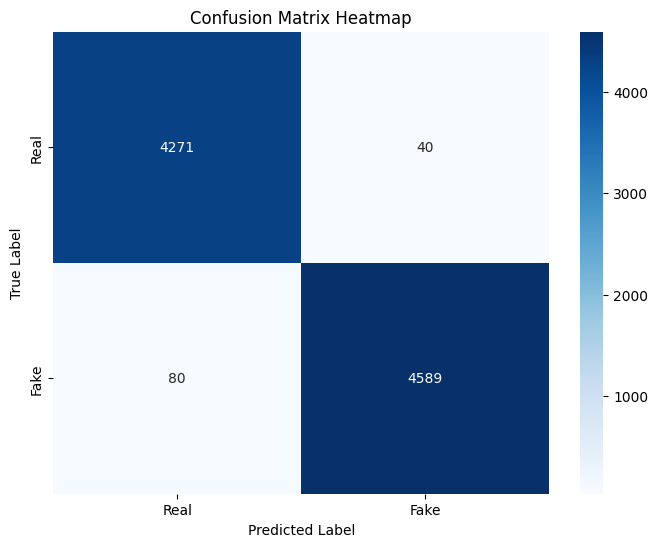

In [27]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Choosing which confusion matrix
cm = cm_logi
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Select a few examples from the test set
num_examples = 5
sample_indices = x_test.sample(num_examples, random_state=42).index

# Get the corresponding text and true labels
# Get the corresponding true labels using the index from the original dataframe
sample_true_labels = df.loc[sample_indices, 'label'].values


# Make predictions on the sample texts
sample_predictions = pipeline.predict(x_test.loc[sample_indices])

# Display the results
print("Examples from the test set and their predictions:")
for i in range(num_examples):
    print(f"\n--- Example {i+1} ---")
    print(f"Text: {sample_texts.iloc[i][:500]}...") # Displaying only the first 500 characters
    print(f"True Label: {'Fake' if sample_true_labels[i] == 1 else 'Real'}")
    print(f"Predicted Label: {'Fake' if sample_predictions[i] == 1 else 'Real'}")

Examples from the test set and their predictions:

--- Example 1 ---
Text: The recipient of the Presidential Medal of Freedom from Barack Obama in 2012 had this to say when asked about racism: And I want to see a white man convicted for raping a black woman. Then when you ask me,  Is it over? , I will say yes. Age hasn t dimmed the fire in Toni Morrison, 84. The unwavering voice of black America talks about her latest novel and what it will take for racism to be a thing of the past.Toni Morrison is, without a doubt, a world-class novelist. Her work as an editor, howeve...
True Label: Fake
Predicted Label: Fake

--- Example 2 ---
Text: Nothing shady here, huh? Unbelievable!Even by the standards of arms deals between the United States and Saudi Arabia, this one was enormous. A consortium of American defense contractors led by Boeing would deliver $29 billion worth of advanced fighter jets to the United States  oil-rich ally in the Middle East.Israeli officials were agitated, reportedly c

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

# Pre-processing (DT / RF) - Vectorization & Splitting dataset

# Initialize vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words= 'english'
)

x_train_dt = vectorizer.fit_transform(x_train)
x_test_dt = vectorizer.transform(x_test)

print("Decision Tree & Random Forest Model :")
print(f"Training set size: {x_train_dt.shape[0]}")
print(f"Testing set size: {x_test_dt.shape[0]}")


# Decision Tree
dt_model = tree.DecisionTreeClassifier(criterion='gini',random_state =42)
dt_model.fit(x_train_dt, y_train)

y_pred_dt = dt_model.predict(x_test_dt)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)


# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_dt, y_train)

y_pred_rf = rf_model.predict(x_test_dt)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Decision Tree & Random Forest Model :
Training set size: 35918
Testing set size: 8980
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4311
           1       0.99      1.00      1.00      4669

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
[[4282   29]
 [  15 4654]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4311
           1       1.00      1.00      1.00      4669

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
[[4301   10]
 [  18 4651]]
